<a href="https://colab.research.google.com/github/frank-morales2020/MLxDL/blob/main/NEMO_TOOLKIT_DEMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/NVIDIA/NeMo-Agent-Toolkit.git

In [ ]:
!pip install nvidia-nat -q

In [ ]:
!uv pip install "nvidia-nat[all]"

In [34]:
!nat --version

nat, version 1.5.0.dev10+ge15df42c


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
from google.colab import userdata
api_key = userdata.get('NVIDIA_API_KEY')
import os
os.environ['NVIDIA_API_KEY'] = api_key

In [ ]:
!cat /content/drive/MyDrive/data/workflow.yml

In [ ]:
!nat run --config_file /content/drive/MyDrive/data/workflow.yml --input "List five subspecies of Aardvarks"

In [ ]:
%cd /content/NeMo-Agent-Toolkit/

In [ ]:
!uv pip install -e '.[langchain]'

In [ ]:
!uv pip install -e '.[profiling]'

In [ ]:
!uv pip install -e examples/MCP/simple_calculator_mcp

https://github.com/NVIDIA/NeMo-Agent-Toolkit/blob/develop/examples/MCP/simple_calculator_mcp/README.md

In [ ]:
!nat mcp serve --config_file examples/getting_started/simple_calculator/configs/config.yml

2026-01-15 10:10:46 - INFO     - nat.cli.commands.start:192 - Starting NAT from config file: 'examples/getting_started/simple_calculator/configs/config.yml'
2026-01-15 10:10:47 - INFO     - nat.plugins.mcp.server.memory_profiler:63 - Memory profiling DISABLED
2026-01-15 10:10:47 - INFO     - nat.plugins.mcp.server.front_end_plugin_worker:180 - Function current_datetime is a regular function, building entry workflow
2026-01-15 10:10:47 - INFO     - nat.runtime.session:298 - Shared workflow built (entry_function=current_datetime)
2026-01-15 10:10:47 - INFO     - nat.plugins.mcp.server.front_end_plugin_worker:180 - Function calculator__subtract is a regular function, building entry workflow
2026-01-15 10:10:47 - INFO     - nat.runtime.session:298 - Shared workflow built (entry_function=calculator__subtract)
2026-01-15 10:10:47 - INFO     - nat.plugins.mcp.server.front_end_plugin_worker:180 - Function calculator__add is a regular function, building entry workflow
2026-01-15 10:10:47 - INFO

In [ ]:
#!nat run --config_file examples/MCP/simple_calculator_mcp/configs/config-mcp-client.yml --input "Is the product of 2 * 4 greater than the current hour of the day?"

------------------------------
2026-01-15 10:15:15 - INFO     - nat.front_ends.console.console_front_end_plugin:104 - --------------------------------------------------
Workflow Result:
['Yes, the product of 2 * 4 is greater than the current hour of the day.']
--------------------------------------------------

## NEW - DEMO

In [1]:
# SPDX-FileCopyrightText: Copyright (c) 2025, NVIDIA CORPORATION & AFFILIATES. All rights reserved.
# SPDX-License-Identifier: Apache-2.0

# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at

# http://www.apache.org/licenses/LICENSE-2.0

# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

import os
import shutil
import site
import subprocess
import sys

import yaml

In [2]:
%cd /content/

/content


In [3]:
from google.colab import userdata
api_key = userdata.get('NVIDIA_API_KEY')
import os
os.environ['NVIDIA_API_KEY'] = api_key

In [4]:
import shutil
import site
import subprocess
import sys

import yaml

# Check if the repository already exists
repo_name = "NeMo-Agent-Toolkit"
if not os.path.exists(repo_name):
    print("Cloning NVIDIA NeMo Agent Toolkit repository...")
    subprocess.run(["git", "clone", "https://github.com/NVIDIA/NeMo-Agent-Toolkit.git"], check=True)
    print("Repository cloned successfully!")
else:
    print(f"Repository {repo_name} already exists.")

# Change to the repository directory
os.chdir(repo_name)
print(f"Changed to directory: {os.getcwd()}")

Cloning NVIDIA NeMo Agent Toolkit repository...
Repository cloned successfully!
Changed to directory: /content/NeMo-Agent-Toolkit


In [5]:
!pwd

/content/NeMo-Agent-Toolkit


In [6]:
# Install uv
!curl -LsSf https://astral.sh/uv/install.sh | sh
os.environ["PATH"]=f"/home/ubuntu/.local/bin:{os.environ['PATH']}"

# Install Git LFS
!sudo apt-get install git-lfs

downloading uv 0.9.25 x86_64-unknown-linux-gnu
no checksums to verify
installing to /usr/local/bin
  uv
  uvx
everything's installed!
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.


In [7]:
!pwd

/content/NeMo-Agent-Toolkit


In [8]:
# Initialize, fetch, and update submodules
print("Initializing Git submodules...")
subprocess.run(["git", "submodule", "update", "--init", "--recursive"], check=True)

# Fetch LFS files
print("Setting up Git LFS...")
subprocess.run(["git", "lfs", "install"], check=True)
subprocess.run(["git", "lfs", "fetch"], check=True)
subprocess.run(["git", "lfs", "pull"], check=True)

print("Git setup completed!")

Initializing Git submodules...
Setting up Git LFS...
Git setup completed!


In [9]:
# Check if uv is available, otherwise use pip
if shutil.which("uv"):
    print("Installing NeMo Agent Toolkit using uv...")

    # Create virtual environment with uv (specifying Python 3.12 as recommended)
    subprocess.run(["uv", "venv", "--python", "3.12", "--seed", ".venv"], check=True)
    print("Virtual environment created successfully!")

    # Install all dependencies including profiling tools and plugins
    subprocess.run(["uv", "sync", "--all-groups", "--all-extras"], check=True)
    print("Installation completed with uv!")

    # Activate the virtual environment for this session
    venv_path = os.path.join(os.getcwd(), ".venv")
    if os.name == 'nt':  # Windows
        scripts_dir = os.path.join(venv_path, "Scripts")
        python_exe = os.path.join(scripts_dir, "python.exe")
    else:  # Unix/Linux/macOS
        scripts_dir = os.path.join(venv_path, "bin")
        python_exe = os.path.join(scripts_dir, "python")

    # Add virtual environment to Python path
    site_pkgs = "site-packages" if os.name == 'nt' else "lib/python{}.{}/site-packages".format(*sys.version_info[:2])
    site.addsitedir(os.path.join(venv_path, "Lib", site_pkgs))

    # Update PATH to include the virtual environment's Scripts bin directory
    current_path = os.environ.get('PATH', '')
    os.environ['PATH'] = scripts_dir + os.pathsep + current_path

    print(f"Virtual environment activated! Scripts directory: {scripts_dir}")

else:
    print("uv not found, using pip instead...")
    print("Note: uv is recommended for proper installation. Please install uv for best results.")
    # Install using pip
    subprocess.run([sys.executable, "-m", "pip", "install", "-e", ".[profiling]"], check=True)
    print("Installation completed with pip!")

Installing NeMo Agent Toolkit using uv...
Virtual environment created successfully!
Installation completed with uv!
Virtual environment activated! Scripts directory: /content/NeMo-Agent-Toolkit/.venv/bin


In [10]:
# Verify installation
print("Checking installation...")
print(f"Current working directory: {os.getcwd()}")
print(f"Python executable: {sys.executable}")
print(f"PATH: {os.environ.get('PATH', '')[:200]}...")  # Show first 200 chars of PATH

# Check if nat command is available
nat_path = shutil.which("nat")
if nat_path:
    print(f"nat command found at: {nat_path}")
else:
    print("nat command not found in PATH")

    # Check if it exists in the virtual environment
    venv_path = os.path.join(os.getcwd(), ".venv")
    if os.name == 'nt':  # Windows
        potential_nat = os.path.join(venv_path, "Scripts", "nat.exe")
    else:  # Unix/Linux/macOS
        potential_nat = os.path.join(venv_path, "bin", "nat")

    if os.path.exists(potential_nat):
        print(f"nat found in virtual environment at: {potential_nat}")
        print("The virtual environment may not be properly activated.")
    else:
        print(f"nat not found at expected location: {potential_nat}")

# Try to run nat command
try:
    result = subprocess.run(["nat", "--version"], capture_output=True, text=True, check=True)
    print(f"✅ NeMo Agent Toolkit version: {result.stdout.strip()}")
    print("✅ Installation verified successfully!")
except subprocess.CalledProcessError as e:
    print(f"❌ Error running nat --version: {e}")
    print(f"Return code: {e.returncode}")
    if e.stderr:
        print(f"Error output: {e.stderr}")
except FileNotFoundError as e:
    print(f"❌ nat command not found: {e}")
    print("\nTroubleshooting steps:")
    print("1. Make sure uv is installed: pip install uv")
    print("2. Re-run the installation cell above")
    print("3. Check that the virtual environment was created successfully")
    print("4. Manually activate the virtual environment if needed:")
    if os.name == 'nt':
        print("   .venv\\Scripts\\activate")
    else:
        print("   source .venv/bin/activate")

Checking installation...
Current working directory: /content/NeMo-Agent-Toolkit
Python executable: /usr/bin/python3
PATH: /content/NeMo-Agent-Toolkit/.venv/bin:/home/ubuntu/.local/bin:/opt/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin...
nat command found at: /content/NeMo-Agent-Toolkit/.venv/bin/nat
✅ NeMo Agent Toolkit version: nat, version 1.5.0.dev10+ge15df42c
✅ Installation verified successfully!


In [11]:
# Helper function to run nat commands with proper environment
def run_nat_command(args, **kwargs):
    """
    Run nat command with proper virtual environment activation.
    This ensures the command works even if the notebook environment isn't fully activated.
    """
    venv_path = os.path.join(os.getcwd(), ".venv")

    if os.name == 'nt':  # Windows
        nat_executable = os.path.join(venv_path, "Scripts", "nat.exe")
        python_executable = os.path.join(venv_path, "Scripts", "python.exe")
    else:  # Unix/Linux/macOS
        nat_executable = os.path.join(venv_path, "bin", "nat")
        python_executable = os.path.join(venv_path, "bin", "python")

    # Try direct nat executable first
    if os.path.exists(nat_executable):
        cmd = [nat_executable] + args
        print(f"Running: {' '.join(cmd)}")
        return subprocess.run(cmd, check=True, **kwargs)

    # Fallback to python -m nat
    elif os.path.exists(python_executable):
        cmd = [python_executable, "-m", "nat"] + args
        print(f"Running: {' '.join(cmd)}")
        return subprocess.run(cmd, check=True, **kwargs)

    # Last resort: try system nat
    else:
        cmd = ["nat"] + args
        print(f"Running: {' '.join(cmd)}")
        return subprocess.run(cmd, check=True, **kwargs)

# Test the helper function
print("Testing nat command with helper function...")
try:
    result = run_nat_command(["--version"], capture_output=True, text=True)
    print(f"✅ Success! Version: {result.stdout.strip()}")
except Exception as e:
    print(f"❌ Still having issues: {e}")
    print("The installation may need to be re-run.")

Testing nat command with helper function...
Running: /content/NeMo-Agent-Toolkit/.venv/bin/nat --version
✅ Success! Version: nat, version 1.5.0.dev10+ge15df42c


In [12]:
!pwd

/content/NeMo-Agent-Toolkit


In [13]:
source_config = "examples/evaluation_and_profiling/simple_calculator_eval/configs/config-sizing-calc.yml"

# Set up environment variables and directories
calc_output_dir = "results/sizing_calc/"
config_file = os.path.join(calc_output_dir, "config-sizing-calc.yml")

# Create output directory
os.makedirs(calc_output_dir, exist_ok=True)

# Copy the example configuration file
if os.path.exists(source_config):
    shutil.copy(source_config, config_file)
    print(f"Configuration file copied to: {config_file}")
else:
    print(f"Warning: Source configuration file not found at {source_config}")
    print("You may need to create a custom configuration file.")

print(f"Output directory: {calc_output_dir}")
print(f"Config file: {config_file}")

Configuration file copied to: results/sizing_calc/config-sizing-calc.yml
Output directory: results/sizing_calc/
Config file: results/sizing_calc/config-sizing-calc.yml


In [14]:
print(config_file)

results/sizing_calc/config-sizing-calc.yml


In [15]:
!cat results/sizing_calc/config-sizing-calc.yml

# SPDX-FileCopyrightText: Copyright (c) 2024-2026, NVIDIA CORPORATION & AFFILIATES. All rights reserved.
# SPDX-License-Identifier: Apache-2.0
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# SPDX-FileCopyrightText: Copyright (c) 2024-2026, NVIDIA CORPORATION & AFFILIATES. All rights reserved.
# SPDX-License-Identifier: Apache-2.0
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the Licen

In [16]:
print(calc_output_dir)

results/sizing_calc/


In [30]:
# Define parameters for metric gathering
concurrencies = "1,2,4,8,16,32"
num_passes = 2

# Build the command
gather_metrics_cmd = [
    "nat", "sizing", "calc",
    "--config_file", config_file,
    "--calc_output_dir", calc_output_dir,
    "--concurrencies", concurrencies,
    "--num_passes", str(num_passes)
]

try:
    result = subprocess.run(gather_metrics_cmd, check=True, capture_output=True, text=True)
    print("Metrics gathering completed successfully!")
    print(result.stdout)
except subprocess.CalledProcessError as e:
    print(f"Error running sizing calculator: {e}\n")
    print(f"Error output: {e.stderr}\n")


Metrics gathering completed successfully!
Both --target_llm_latency and --target_workflow_runtime are 0. GPU count will not be estimated.
Test GPU count is 0. Tests will be run but the GPU count will not be estimated.
Target users is 0. Tests will be run but the GPU count will not be estimated.
Targets: LLM Latency ≤ 0.0s, Workflow Runtime ≤ 0.0s, Users = 0
Test parameters: GPUs = 0
Per concurrency results:
Alerts!: W = Workflow interrupted, L = LLM latency outlier, R = Workflow runtime outlier
| Alerts   |   Concurrency |   p95 LLM Latency |   p95 WF Runtime |   Total Runtime |
|----------|---------------|-------------------|------------------|-----------------|
|          |             1 |          0.764799 |          1.74755 |         3.3007  |
|          |             2 |          0.704025 |          1.67103 |         3.1247  |
| !W       |             4 |          0.72313  |          3.56038 |         4.16979 |
| !W       |             8 |          0.563599 |          2.59658 |   

In [ ]:
# add matplotlib to env to display plots
!"{sys.executable}" -m ensurepip --upgrade
!"{sys.executable}" -m pip install --upgrade pip setuptools wheel
!"{sys.executable}" -m pip install matplotlib

In [ ]:
# Helper functions to display the generated plots

import os

import matplotlib.pyplot as plt
from PIL import Image


def display_online_simple():
    root_folder = "results/sizing_calc/online"
    filename = "concurrency_vs_p95_simple.png"

    # Find all matching images
    image_paths = []

    for folder_name in os.listdir(root_folder):
        folder_path = os.path.join(root_folder, folder_name)
        if os.path.isdir(folder_path):  # Only check directories
            image_path = os.path.join(folder_path, filename)
            if os.path.isfile(image_path):
                image_paths.append(image_path)

    # Display all found images
    if not image_paths:
        print("No images found!")
        return

    print(f"Found {len(image_paths)} images:")
    for i, img_path in enumerate(image_paths):
        print(f"  {i+1}. {img_path}")

        # Display the image
        img = Image.open(img_path)
        plt.figure(figsize=(15, 9))
        plt.imshow(img)
        plt.title(f"Image {i+1}: {os.path.basename(os.path.dirname(img_path))}")
        plt.axis('off')
        plt.show()

def display_online_analysis():
    root_folder = "results/sizing_calc/online"
    filename = "concurrency_vs_p95_analysis.png"

    # Find all matching images
    image_paths = []

    for folder_name in os.listdir(root_folder):
        folder_path = os.path.join(root_folder, folder_name)
        if os.path.isdir(folder_path):  # Only check directories
            image_path = os.path.join(folder_path, filename)
            if os.path.isfile(image_path):
                image_paths.append(image_path)

    # Display all found images
    if not image_paths:
        print("No images found!")
        return

    print(f"Found {len(image_paths)} images:")
    for i, img_path in enumerate(image_paths):
        print(f"  {i+1}. {img_path}")

        # Display the image
        img = Image.open(img_path)
        plt.figure(figsize=(15, 9))
        plt.imshow(img)
        plt.title(f"Image {i+1}: {os.path.basename(os.path.dirname(img_path))}")
        plt.axis('off')
        plt.show()

def display_offline_simple():
    root_folder = "results/sizing_calc/offline"
    filename = "concurrency_vs_p95_simple.png"

    # Find all matching images
    image_paths = []

    for folder_name in os.listdir(root_folder):
        folder_path = os.path.join(root_folder, folder_name)
        if os.path.isdir(folder_path):  # Only check directories
            image_path = os.path.join(folder_path, filename)
            if os.path.isfile(image_path):
                image_paths.append(image_path)

    # Display all found images
    if not image_paths:
        print("No images found!")
        return

    print(f"Found {len(image_paths)} images:")
    for i, img_path in enumerate(image_paths):
        print(f"  {i+1}. {img_path}")

        # Display the image
        img = Image.open(img_path)
        plt.figure(figsize=(15, 9))
        plt.imshow(img)
        plt.title(f"Image {i+1}: {os.path.basename(os.path.dirname(img_path))}")
        plt.axis('off')
        plt.show()

def display_offline_analysis():
    root_folder = "results/sizing_calc/offline"
    filename = "concurrency_vs_p95_analysis.png"

    # Find all matching images
    image_paths = []

    for folder_name in os.listdir(root_folder):
        folder_path = os.path.join(root_folder, folder_name)
        if os.path.isdir(folder_path):  # Only check directories
            image_path = os.path.join(folder_path, filename)
            if os.path.isfile(image_path):
                image_paths.append(image_path)

    # Display all found images
    if not image_paths:
        print("No images found!")
        return

    print(f"Found {len(image_paths)} images:")
    for i, img_path in enumerate(image_paths):
        print(f"  {i+1}. {img_path}")

        # Display the image
        img = Image.open(img_path)
        plt.figure(figsize=(15, 9))
        plt.imshow(img)
        plt.title(f"Image {i+1}: {os.path.basename(os.path.dirname(img_path))}")
        plt.axis('off')
        plt.show()

Found 1 images:
  1. results/sizing_calc/online/job_1768471397/concurrency_vs_p95_simple.png


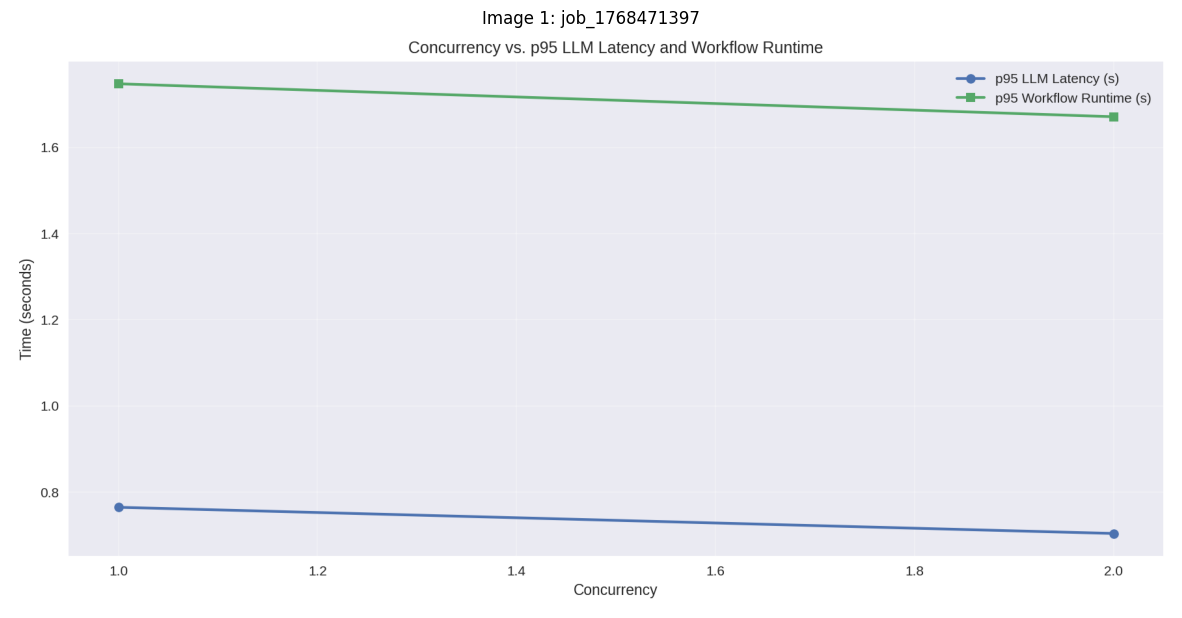

In [31]:
display_online_simple()

Found 1 images:
  1. results/sizing_calc/online/job_1768471397/concurrency_vs_p95_analysis.png


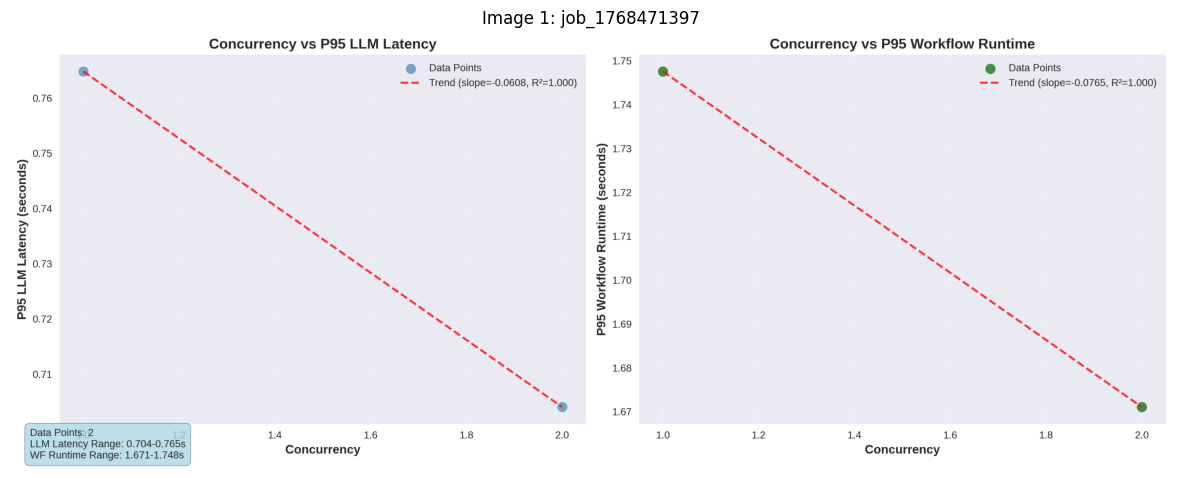

In [32]:
display_online_analysis()

In [29]:
# Define parameters
config_file='/content/NeMo-Agent-Toolkit/examples/evaluation_and_profiling/simple_web_query_eval/configs/eval_config_llama31.yml'

# Build the command
gather_metrics_cmd = [
    "nat", "eval",
    "--config_file", config_file,
]


#!nat eval --config_file /content/NeMo-Agent-Toolkit/examples/evaluation_and_profiling/simple_web_query_eval/configs/eval_config_llama31.yml

try:
    result = subprocess.run(gather_metrics_cmd, check=True, capture_output=True, text=True)
    print("Metrics gathering completed successfully!")
    print(result.stdout)
except subprocess.CalledProcessError as e:
    print(f"Error running sizing calculator: {e}\n")
    print(f"Error output: {e.stderr}\n")


Metrics gathering completed successfully!

=== EVALUATION SUMMARY ===
Workflow Status: COMPLETED (workflow_output.json)
Total Runtime: 8.46s
Workflow Runtime (p95): 1.97s
LLM Latency (p95): 0.69s

Per evaluator results:
| Evaluator           |   Avg Score | Output File                     |
|---------------------|-------------|---------------------------------|
| relevance           |         1   | relevance_output.json           |
| groundedness        |         1   | groundedness_output.json        |
| accuracy            |         0.6 | accuracy_output.json            |
| trajectory_accuracy |         0.7 | trajectory_accuracy_output.json |


